In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Similarity Functions

In [ ]:
# import the necessary packages
from skimage import measure
import argparse
import imutils
import cv2
from numpy import asarray
import matplotlib.pyplot as plt
def similartiy_for_nfp(truth_path, predict_path):
  truth = cv2.imread(truth_path)
  predict = cv2.imread(predict_path)
  #resize
  width = predict.shape[1]
  height = predict.shape[0]

  truth = cv2.resize(truth, (width, height))

  # convert the images to grayscale
  grayA = cv2.cvtColor(truth, cv2.COLOR_BGR2GRAY)
  grayB = cv2.cvtColor(predict, cv2.COLOR_BGR2GRAY)

  pixelsA = asarray(grayA)
  pixelsB = asarray(grayB)

  pixelsA = pixelsA.astype('float32')
  pixelsB = pixelsB.astype('float32')

  pixelsA /= 255.0
  pixelsB /= 255.0

  # compute the Structural Similarity Index (SSIM) between the two
  # images, ensuring that the difference image is returned
  (score, diff) = measure.compare_ssim(pixelsA, pixelsB, full=True)
  diff = (diff * 255).astype("uint8")
  
  return score, diff

In [ ]:
from PIL import Image, ImageChops
import math, operator
def rmse(truth_path, predict_path):
    truth = Image.open(truth_path)
    predict = Image.open(predict_path)
    "Calculate the root-mean-square difference between two images"
    diff = ImageChops.difference(truth, predict)
    h = diff.histogram()
    sq = (value*((idx%256)**2) for idx, value in enumerate(h))
    sum_of_squares = sum(sq)
    rms = math.sqrt(sum_of_squares/float(truth.size[0] * truth.size[1]))
    return rms

# Conv_lstm

## Model 1

### Circle

Conv_lstm Model-1 With Circle Dataset

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.


RMSE: 33.24138986263962    SSIM: 0.37542676287373145
RMSE: 38.47966183583219    SSIM: 0.3470847679555939
RMSE: 53.79330232473184    SSIM: 0.289247271554752
RMSE: 62.00998407514712    SSIM: 0.31775838508974624
RMSE: 74.37355880956619    SSIM: 0.40197103466042794
RMSE: 80.59709206913112    SSIM: 0.43598893383750326
RMSE: 88.01844622009638    SSIM: 0.4463481633888731
RMSE: 92.57247836155193    SSIM: 0.4307283310233946
RMSE: 99.86508711757078    SSIM: 0.4065147233649009
RMSE: 102.87670411711292    SSIM: 0.38216219450234856


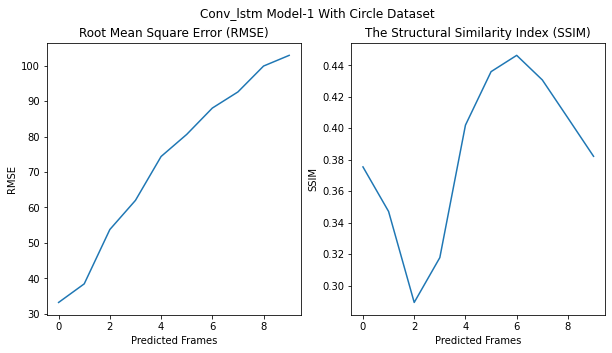

In [ ]:
conv_circle_rmse = []
conv_circle_ssim = []
for x in range(10):
  truth_path = "/content/drive/MyDrive/conv_lstm_circle_predictions/1004/"+str(x)+"_ground_truth.png" 
  predict_path = "/content/drive/MyDrive/conv_lstm_circle_predictions/1004/"+str(x)+"_prediction.png" 
  rms=rmse(truth_path,predict_path)
  conv_circle_rmse.append(rms)
  sim_score, diff = similartiy_for_nfp(truth_path, predict_path)
  conv_circle_ssim.append(sim_score)
  print("RMSE: {}    SSIM: {}".format(rms,sim_score))

fig, ax = plt.subplots(1,2,figsize=(10, 5))
ax[0].plot(conv_circle_rmse)
ax[1].plot(conv_circle_ssim)
ax[0].set(title='Root Mean Square Error (RMSE)')
ax[0].set_xlabel('Predicted Frames')
ax[0].set_ylabel('RMSE')
ax[1].set(title='The Structural Similarity Index (SSIM)')
ax[1].set_xlabel('Predicted Frames')
ax[1].set_ylabel('SSIM')
fig.suptitle('Conv_lstm Model-1 With Circle Dataset')
plt.show()

### Moving Mnist

Conv_lstm Model-1 With Moving Mnist Dataset

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.


RMSE: 39.53151432717952    SSIM: 0.39381692295915977
RMSE: 81.72128318253452    SSIM: 0.07169090374097967
RMSE: 87.12271517807511    SSIM: 0.034377419585188966
RMSE: 77.04217594928119    SSIM: 0.10389831122092036
RMSE: 71.27161514235523    SSIM: 0.16279891800928878
RMSE: 75.71593706083284    SSIM: 0.17015967114957342
RMSE: 85.60750551207529    SSIM: 0.19628544130518505
RMSE: 91.09671028637642    SSIM: 0.2480461418269864
RMSE: 91.93492263552518    SSIM: 0.2825116958828828
RMSE: 96.11120837342541    SSIM: 0.2589624883954547


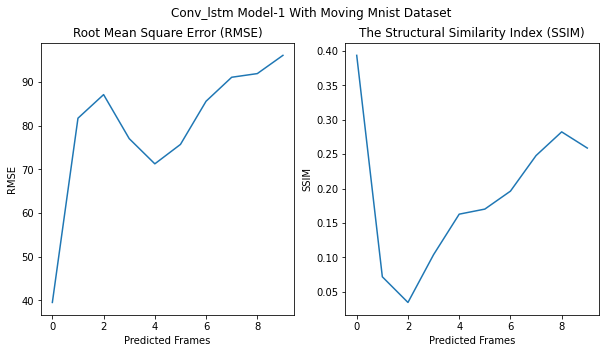

In [ ]:
conv_mnist_rmse = []
conv_mnist_ssim = []
for x in range(10):
  truth_path = "/content/drive/MyDrive/conv_lstm_mnist_predictions/1004_resized_10/"+str(x)+"_ground_truth.png" 
  predict_path = "/content/drive/MyDrive/conv_lstm_mnist_predictions/1004_resized_10/"+str(x)+"_prediction.png" 
  rms=rmse(truth_path,predict_path)
  conv_mnist_rmse.append(rms)
  sim_score, diff = similartiy_for_nfp(truth_path, predict_path)
  conv_mnist_ssim.append(sim_score)
  print("RMSE: {}    SSIM: {}".format(rms,sim_score))

fig, ax = plt.subplots(1,2,figsize=(10, 5))
ax[0].plot(conv_mnist_rmse)
ax[1].plot(conv_mnist_ssim)
ax[0].set(title='Root Mean Square Error (RMSE)')
ax[0].set_xlabel('Predicted Frames')
ax[0].set_ylabel('RMSE')
ax[1].set(title='The Structural Similarity Index (SSIM)')
ax[1].set_xlabel('Predicted Frames')
ax[1].set_ylabel('SSIM')
fig.suptitle('Conv_lstm Model-1 With Moving Mnist Dataset')
plt.show()

## Model 2

### Circle

Conv_lstm Model-2 With Circle Dataset

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.


RMSE: 24.04871683167316    SSIM: 0.9707691583911735
RMSE: 23.96761812842486    SSIM: 0.9704667746348241
RMSE: 23.729234342894422    SSIM: 0.9708232192455437
RMSE: 23.418762510004665    SSIM: 0.9717326947455742
RMSE: 22.211230267592114    SSIM: 0.9751946153732673
RMSE: 20.986234327530035    SSIM: 0.9773192059910982
RMSE: 18.969996870057727    SSIM: 0.9809512869695262
RMSE: 15.107184755936494    SSIM: 0.9862250106468683
RMSE: 8.335213329603508    SSIM: 0.989591482654533
RMSE: 12.38658548591984    SSIM: 0.9791851856269322


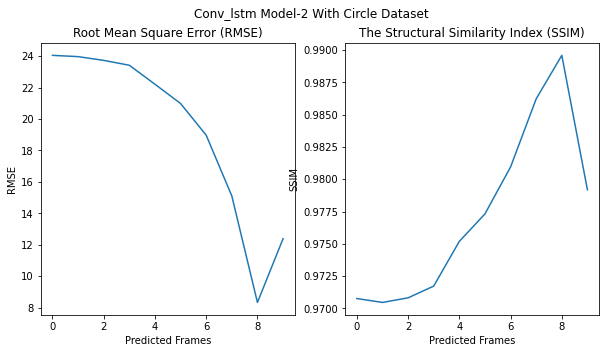

In [ ]:
conv_circle_rmse2 = []
conv_circle_ssim2 = []
for x in range(10):
  truth_path = "/content/drive/MyDrive/new_conv_lstm_circle_predictions/orig_"+str(x)+".png" 
  predict_path = "/content/drive/MyDrive/new_conv_lstm_circle_predictions/predict_"+str(x)+".png" 
  rms=rmse(truth_path,predict_path)
  conv_circle_rmse2.append(rms)
  sim_score, diff = similartiy_for_nfp(truth_path, predict_path)
  conv_circle_ssim2.append(sim_score)
  print("RMSE: {}    SSIM: {}".format(rms,sim_score))

fig, ax = plt.subplots(1,2,figsize=(10, 5))
ax[0].plot(conv_circle_rmse2)
ax[1].plot(conv_circle_ssim2)
ax[0].set(title='Root Mean Square Error (RMSE)')
ax[0].set_xlabel('Predicted Frames')
ax[0].set_ylabel('RMSE')
ax[1].set(title='The Structural Similarity Index (SSIM)')
ax[1].set_xlabel('Predicted Frames')
ax[1].set_ylabel('SSIM')
fig.suptitle('Conv_lstm Model-2 With Circle Dataset')
plt.show()

### Moving Mnist

Conv_lstm Model-2 With Moving Mnist Dataset

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.


RMSE: 48.327776429392806    SSIM: 0.23059897377844177
RMSE: 45.30423954878561    SSIM: 0.3007793394183565
RMSE: 49.32324473007757    SSIM: 0.35274273606871115
RMSE: 51.26253657643172    SSIM: 0.44096065364939174
RMSE: 49.65582716937661    SSIM: 0.5698628898447174
RMSE: 51.62416057504591    SSIM: 0.6371432274417611
RMSE: 53.01747390306804    SSIM: 0.6742401152033601
RMSE: 56.277760077111054    SSIM: 0.6609958010896576
RMSE: 57.74155909294773    SSIM: 0.6693931067120944
RMSE: 59.87125265543765    SSIM: 0.6696647905042603


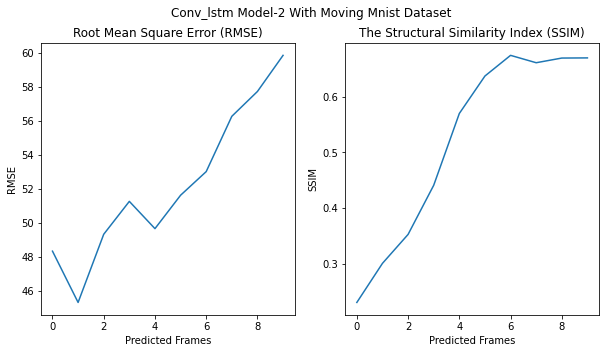

In [ ]:
conv_mnist_rmse2 = []
conv_mnist_ssim2 = []
for x in range(10):
  truth_path = "/content/drive/MyDrive/new_conv_lstm_mnist_prediction/"+str(x)+"_truth.png" 
  predict_path = "/content/drive/MyDrive/new_conv_lstm_mnist_prediction/"+str(x)+"_predict.png" 
  rms=rmse(truth_path,predict_path)
  conv_mnist_rmse2.append(rms)
  sim_score, diff = similartiy_for_nfp(truth_path, predict_path)
  conv_mnist_ssim2.append(sim_score)
  print("RMSE: {}    SSIM: {}".format(rms,sim_score))

fig, ax = plt.subplots(1,2,figsize=(10, 5))
ax[0].plot(conv_mnist_rmse2)
ax[1].plot(conv_mnist_ssim2)
ax[0].set(title='Root Mean Square Error (RMSE)')
ax[0].set_xlabel('Predicted Frames')
ax[0].set_ylabel('RMSE')
ax[1].set(title='The Structural Similarity Index (SSIM)')
ax[1].set_xlabel('Predicted Frames')
ax[1].set_ylabel('SSIM')
fig.suptitle('Conv_lstm Model-2 With Moving Mnist Dataset')
plt.show()

# Multiscale GAN

## Circle

Multiscale GAN With Circle Dataset

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.


RMSE: 18.442021426537682    SSIM: 0.9708717478787375
RMSE: 21.09259256083756    SSIM: 0.9689476748245953
RMSE: 25.36172874936269    SSIM: 0.9646694902490853
RMSE: 29.84144297365662    SSIM: 0.9595359379450067
RMSE: 33.782453291474035    SSIM: 0.9580071786091265
RMSE: 37.170712466058205    SSIM: 0.9566874886254197
RMSE: 40.55502085805006    SSIM: 0.9559623918889634
RMSE: 43.235874228613675    SSIM: 0.9558023190705095
RMSE: 45.16591592049806    SSIM: 0.9569727115478173
RMSE: 47.03164970760381    SSIM: 0.9575209452939188


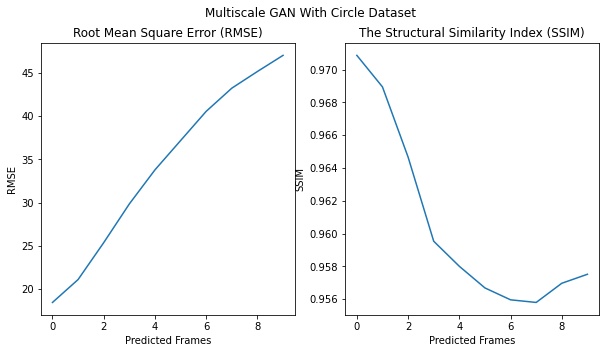

In [ ]:
multiscalegan_circle_rmse = []
multiscalegan_circle_ssim = []
for x in range(10):
  truth_path = "/content/drive/MyDrive/multi_scale_GAN_circle_prediction/GROUNG_TRUTH"+str(x)+".png" 
  predict_path = "/content/drive/MyDrive/multi_scale_GAN_circle_prediction/NORM_OUTPUTS"+str(x)+".png" 
  rms=rmse(truth_path,predict_path)
  multiscalegan_circle_rmse.append(rms)
  sim_score, diff = similartiy_for_nfp(truth_path, predict_path)
  multiscalegan_circle_ssim.append(sim_score)
  print("RMSE: {}    SSIM: {}".format(rms,sim_score))

fig, ax = plt.subplots(1,2,figsize=(10, 5))
ax[0].plot(multiscalegan_circle_rmse)
ax[1].plot(multiscalegan_circle_ssim)
ax[0].set(title='Root Mean Square Error (RMSE)')
ax[0].set_xlabel('Predicted Frames')
ax[0].set_ylabel('RMSE')
ax[1].set(title='The Structural Similarity Index (SSIM)')
ax[1].set_xlabel('Predicted Frames')
ax[1].set_ylabel('SSIM')
fig.suptitle('Multiscale GAN With Circle Dataset')
plt.show()

# Pix2pix

## Circle

Pix2pix 50 Epoch With Circle Dataset (using 60 frame)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.


RMSE: 9.157647077715978    SSIM: 0.985810887850844
RMSE: 12.6986957991756    SSIM: 0.977059589676831
RMSE: 17.308894028793404    SSIM: 0.9652290081856889
RMSE: 21.828217832658716    SSIM: 0.9562762708942982
RMSE: 25.787197041361438    SSIM: 0.9497762321920573
RMSE: 29.3801591214207    SSIM: 0.9457001339961096
RMSE: 33.54201423215368    SSIM: 0.9442907137401666
RMSE: 37.447125223440054    SSIM: 0.9431006470207848
RMSE: 39.75593509150552    SSIM: 0.9437299947356776
RMSE: 43.01845715794559    SSIM: 0.9433397761304502


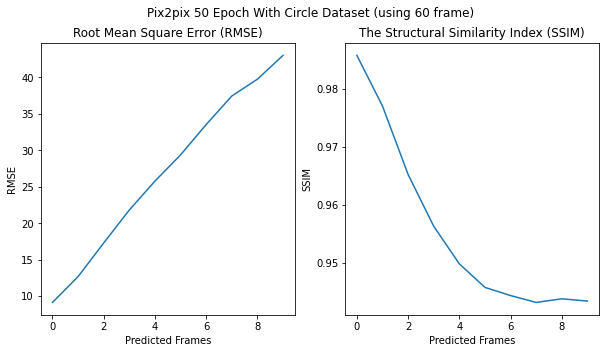

In [ ]:
pix2pix_circle_rmse_50epoch = []
pix2pix_circle_ssim_50epoch  = []
for x in range(10):
  truth_path = "/content/drive/MyDrive/pix2pix_circle_predictions/circle_80/train_frames/frame-0000"+str(60+x)+".jpg"
  predict_path = "/content/drive/MyDrive/pix2pix_circle_predictions/circle_50epoch/frames/frame-000"+str(60+x)+".jpg"
  rms=rmse(truth_path,predict_path)
  pix2pix_circle_rmse_50epoch .append(rms)
  sim_score, diff = similartiy_for_nfp(truth_path, predict_path)
  pix2pix_circle_ssim_50epoch .append(sim_score)
  print("RMSE: {}    SSIM: {}".format(rms,sim_score))

fig, ax = plt.subplots(1,2,figsize=(10, 5))
ax[0].plot(pix2pix_circle_rmse_50epoch )
ax[1].plot(pix2pix_circle_ssim_50epoch )
ax[0].set(title='Root Mean Square Error (RMSE)')
ax[0].set_xlabel('Predicted Frames')
ax[0].set_ylabel('RMSE')
ax[1].set(title='The Structural Similarity Index (SSIM)')
ax[1].set_xlabel('Predicted Frames')
ax[1].set_ylabel('SSIM')
fig.suptitle('Pix2pix 50 Epoch With Circle Dataset (using 60 frame)')
plt.show()

Pix2pix 100 Epoch With Circle Dataset (using 60 frame)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.


RMSE: 8.43678700691205    SSIM: 0.9910689387496352
RMSE: 9.304938205060795    SSIM: 0.9861793030040082
RMSE: 12.824567487833654    SSIM: 0.9792711584469029
RMSE: 17.1031475538861    SSIM: 0.9726397022736377
RMSE: 21.054668425316034    SSIM: 0.9647153976855193
RMSE: 24.172818541700924    SSIM: 0.959926648968039
RMSE: 27.633573330280687    SSIM: 0.9595510127735087
RMSE: 29.19173684452503    SSIM: 0.960564293903457
RMSE: 31.874482838941873    SSIM: 0.9645444716936591
RMSE: 35.44957466246951    SSIM: 0.9653399873465414


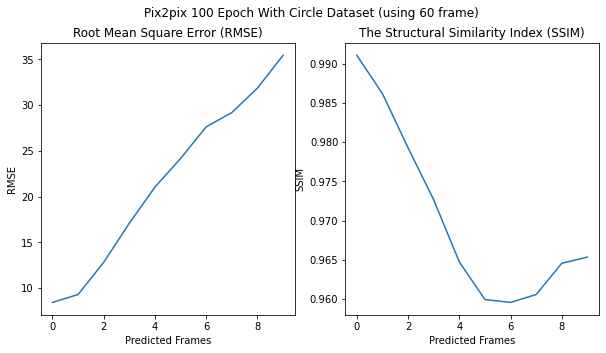

In [ ]:
pix2pix_circle_rmse_100epoch = []
pix2pix_circle_ssim_100epoch  = []
for x in range(10):
  truth_path = "/content/drive/MyDrive/pix2pix_circle_predictions/circle_80/train_frames/frame-0000"+str(60+x)+".jpg"
  predict_path = "/content/drive/MyDrive/pix2pix_circle_predictions/circle_100epoch/frames/frame-000"+str(60+x)+".jpg"
  rms=rmse(truth_path,predict_path)
  pix2pix_circle_rmse_100epoch .append(rms)
  sim_score, diff = similartiy_for_nfp(truth_path, predict_path)
  pix2pix_circle_ssim_100epoch .append(sim_score)
  print("RMSE: {}    SSIM: {}".format(rms,sim_score))

fig, ax = plt.subplots(1,2,figsize=(10, 5))
ax[0].plot(pix2pix_circle_rmse_100epoch )
ax[1].plot(pix2pix_circle_ssim_100epoch )
ax[0].set(title='Root Mean Square Error (RMSE)')
ax[0].set_xlabel('Predicted Frames')
ax[0].set_ylabel('RMSE')
ax[1].set(title='The Structural Similarity Index (SSIM)')
ax[1].set_xlabel('Predicted Frames')
ax[1].set_ylabel('SSIM')
fig.suptitle('Pix2pix 100 Epoch With Circle Dataset (using 60 frame)')
plt.show()

Pix2pix 200 Epoch With Circle Dataset (using 60 frame)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.


RMSE: 4.878668491504624    SSIM: 0.9942839525963125
RMSE: 9.052753379497311    SSIM: 0.9934077889567403
RMSE: 14.180372659066474    SSIM: 0.990798130803614
RMSE: 21.44832088416247    SSIM: 0.9890010055150529
RMSE: 27.412457250308663    SSIM: 0.9863884537388838
RMSE: 31.76100941012423    SSIM: 0.9793683637472451
RMSE: 37.615943677515254    SSIM: 0.9670102992273946
RMSE: 43.59163301311388    SSIM: 0.9555432683374723
RMSE: 46.23963059432893    SSIM: 0.9504085291619678
RMSE: 48.43453700614882    SSIM: 0.9448891288857236


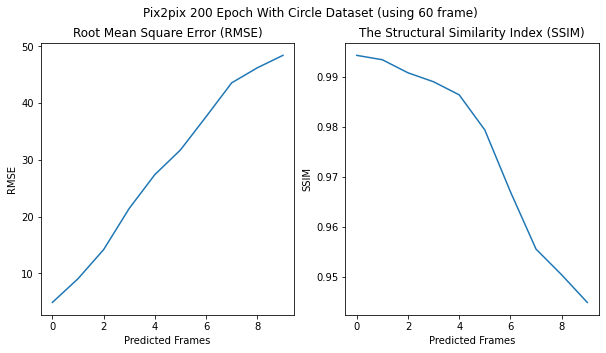

In [ ]:
pix2pix_circle_rmse_200epoch = []
pix2pix_circle_ssim_200epoch  = []
for x in range(10):
  truth_path = "/content/drive/MyDrive/pix2pix_circle_predictions/circle_80/train_frames/frame-0000"+str(60+x)+".jpg"
  predict_path = "/content/drive/MyDrive/pix2pix_circle_predictions/circle_200epoch/frames/frame-000"+str(60+x)+".jpg"
  rms=rmse(truth_path,predict_path)
  pix2pix_circle_rmse_200epoch .append(rms)
  sim_score, diff = similartiy_for_nfp(truth_path, predict_path)
  pix2pix_circle_ssim_200epoch .append(sim_score)
  print("RMSE: {}    SSIM: {}".format(rms,sim_score))

fig, ax = plt.subplots(1,2,figsize=(10, 5))
ax[0].plot(pix2pix_circle_rmse_200epoch )
ax[1].plot(pix2pix_circle_ssim_200epoch )
ax[0].set(title='Root Mean Square Error (RMSE)')
ax[0].set_xlabel('Predicted Frames')
ax[0].set_ylabel('RMSE')
ax[1].set(title='The Structural Similarity Index (SSIM)')
ax[1].set_xlabel('Predicted Frames')
ax[1].set_ylabel('SSIM')
fig.suptitle('Pix2pix 200 Epoch With Circle Dataset (using 60 frame)')
plt.show()

Pix2pix With Circle Dataset (using 60 frame)

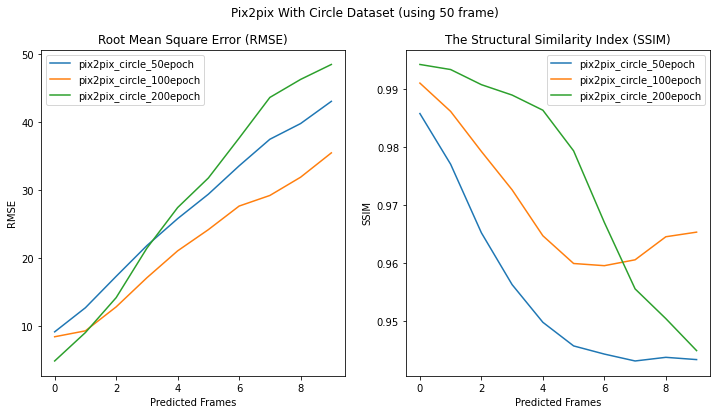

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(12, 6))
ax[0].plot(pix2pix_circle_rmse_50epoch, label= "pix2pix_circle_50epoch")
ax[1].plot(pix2pix_circle_ssim_50epoch, label= "pix2pix_circle_50epoch")
ax[0].plot(pix2pix_circle_rmse_100epoch, label= "pix2pix_circle_100epoch")
ax[1].plot(pix2pix_circle_ssim_100epoch, label= "pix2pix_circle_100epoch")
ax[0].plot(pix2pix_circle_rmse_200epoch, label= "pix2pix_circle_200epoch")
ax[1].plot(pix2pix_circle_ssim_200epoch, label= "pix2pix_circle_200epoch")
ax[0].set(title='Root Mean Square Error (RMSE)')
ax[0].set_xlabel('Predicted Frames')
ax[0].set_ylabel('RMSE')
ax[1].set(title='The Structural Similarity Index (SSIM)')
ax[1].set_xlabel('Predicted Frames')
ax[1].set_ylabel('SSIM')
fig.suptitle('Pix2pix With Circle Dataset (using 50 frame)')
ax[0].legend()
ax[1].legend()
plt.show()

## Moving Mnist

### 60 Frame Moving Mnist

Pix2pix 50 Epoch With 60 Frame Moving Mnist Dataset (using 50 frame)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.


RMSE: 108.61327275051666    SSIM: 0.6885641197264856
RMSE: 120.86187477214433    SSIM: 0.5733146791233004
RMSE: 127.26902427934154    SSIM: 0.5276158934240778
RMSE: 128.99464298924153    SSIM: 0.4886690774705369
RMSE: 127.88317212554053    SSIM: 0.5088599526657966
RMSE: 126.75693398193252    SSIM: 0.49803403780243066
RMSE: 126.2185672117394    SSIM: 0.5108601239519653
RMSE: 128.52355503649417    SSIM: 0.48875476988830024
RMSE: 125.16160061908465    SSIM: 0.5613306385318184
RMSE: 124.35506376808958    SSIM: 0.5935891673389468


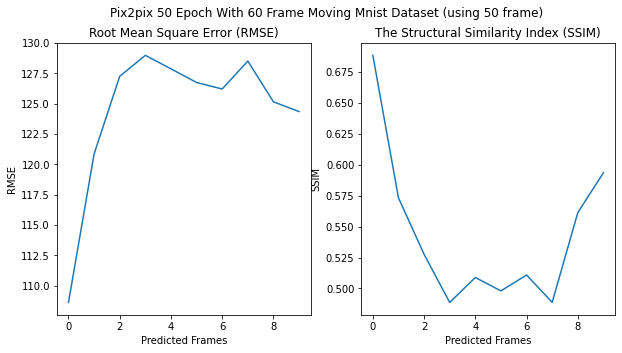

In [ ]:
pix2pix_mnist_rmse_60frame_50test_50epoch = []
pix2pix_mnist_ssim_60frame_50test_50epoch  = []
for x in range(10):
  if x!=9:
    truth_path = "/content/drive/MyDrive/pix2pix_mnist_predictions/60frame_50test/60frame_ground_truth/test_frames/frame-00000"+str(x+1)+".jpg"
  else:
    truth_path = "/content/drive/MyDrive/pix2pix_mnist_predictions/60frame_50test/60frame_ground_truth/test_frames/frame-0000"+str(x+1)+".jpg"

  predict_path = "/content/drive/MyDrive/pix2pix_mnist_predictions/60frame_50test/mnist_60frames_50epoch_50test/frames/frame-000"+str(50+x)+".jpg"
  rms=rmse(truth_path,predict_path)
  pix2pix_mnist_rmse_60frame_50test_50epoch .append(rms)
  sim_score, diff = similartiy_for_nfp(truth_path, predict_path)
  pix2pix_mnist_ssim_60frame_50test_50epoch .append(sim_score)
  print("RMSE: {}    SSIM: {}".format(rms,sim_score))

fig, ax = plt.subplots(1,2,figsize=(10, 5))
ax[0].plot(pix2pix_mnist_rmse_60frame_50test_50epoch )
ax[1].plot(pix2pix_mnist_ssim_60frame_50test_50epoch )
ax[0].set(title='Root Mean Square Error (RMSE)')
ax[0].set_xlabel('Predicted Frames')
ax[0].set_ylabel('RMSE')
ax[1].set(title='The Structural Similarity Index (SSIM)')
ax[1].set_xlabel('Predicted Frames')
ax[1].set_ylabel('SSIM')
fig.suptitle('Pix2pix 50 Epoch With 60 Frame Moving Mnist Dataset (using 50 frame)')
plt.show()

Pix2pix 100 Epoch With 60 Frame Moving Mnist Dataset (using 50 frame)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.


RMSE: 100.43655442538713    SSIM: 0.7261560094530298
RMSE: 112.21838885349851    SSIM: 0.6482312174291588
RMSE: 121.4399154980432    SSIM: 0.576625451235147
RMSE: 125.168523118584    SSIM: 0.5381184111260848
RMSE: 129.16567739456514    SSIM: 0.49964612313240786
RMSE: 126.61173425081896    SSIM: 0.49698824117695634
RMSE: 118.75789241864622    SSIM: 0.5380271744742267
RMSE: 109.64179514303612    SSIM: 0.5846623644364343
RMSE: 114.39527654966791    SSIM: 0.6334853103724687
RMSE: 109.60054089489306    SSIM: 0.6757458555624336


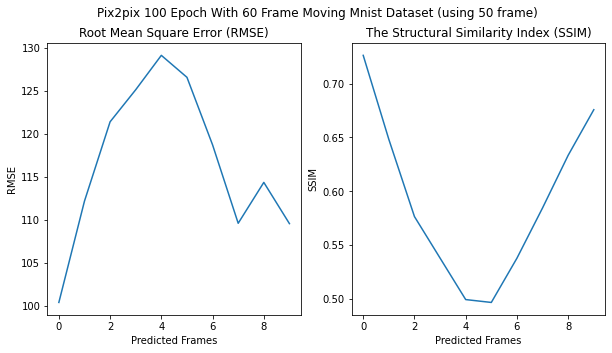

In [ ]:
pix2pix_mnist_rmse_60frame_50test_100epoch = []
pix2pix_mnist_ssim_60frame_50test_100epoch  = []
for x in range(10):
  if x!=9:
    truth_path = "/content/drive/MyDrive/pix2pix_mnist_predictions/60frame_50test/60frame_ground_truth/test_frames/frame-00000"+str(x+1)+".jpg"
  else:
    truth_path = "/content/drive/MyDrive/pix2pix_mnist_predictions/60frame_50test/60frame_ground_truth/test_frames/frame-0000"+str(x+1)+".jpg"

  predict_path = "/content/drive/MyDrive/pix2pix_mnist_predictions/60frame_50test/mnsit_60frames_100epoch_50test/frames/frame-000"+str(50+x)+".jpg"
  rms=rmse(truth_path,predict_path)
  pix2pix_mnist_rmse_60frame_50test_100epoch .append(rms)
  sim_score, diff = similartiy_for_nfp(truth_path, predict_path)
  pix2pix_mnist_ssim_60frame_50test_100epoch .append(sim_score)
  print("RMSE: {}    SSIM: {}".format(rms,sim_score))

fig, ax = plt.subplots(1,2,figsize=(10, 5))
ax[0].plot(pix2pix_mnist_rmse_60frame_50test_100epoch )
ax[1].plot(pix2pix_mnist_ssim_60frame_50test_100epoch )
ax[0].set(title='Root Mean Square Error (RMSE)')
ax[0].set_xlabel('Predicted Frames')
ax[0].set_ylabel('RMSE')
ax[1].set(title='The Structural Similarity Index (SSIM)')
ax[1].set_xlabel('Predicted Frames')
ax[1].set_ylabel('SSIM')
fig.suptitle('Pix2pix 100 Epoch With 60 Frame Moving Mnist Dataset (using 50 frame)')
plt.show()

Pix2pix 200 Epoch With 60 Frame Moving Mnist Dataset (using 50 frame)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.


RMSE: 98.42897532532659    SSIM: 0.745333801551449
RMSE: 106.87352429536746    SSIM: 0.6807927066791812
RMSE: 105.89093971290107    SSIM: 0.6648494405437012
RMSE: 126.1446661838725    SSIM: 0.5626744481372105
RMSE: 121.17068221527691    SSIM: 0.6086524169686147
RMSE: 120.12085284041808    SSIM: 0.6112470921296589
RMSE: 122.5647499076381    SSIM: 0.5914846501284962
RMSE: 121.0217810328992    SSIM: 0.5904222918099229
RMSE: 122.70021505049411    SSIM: 0.5901646579401071
RMSE: 120.75721987667549    SSIM: 0.6227225597749685


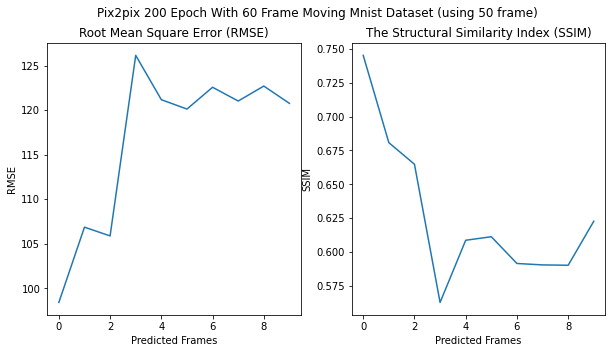

In [ ]:
pix2pix_mnist_rmse_60frame_50test_200epoch = []
pix2pix_mnist_ssim_60frame_50test_200epoch  = []
for x in range(10):
  if x!=9:
    truth_path = "/content/drive/MyDrive/pix2pix_mnist_predictions/60frame_50test/60frame_ground_truth/test_frames/frame-00000"+str(x+1)+".jpg"
  else:
    truth_path = "/content/drive/MyDrive/pix2pix_mnist_predictions/60frame_50test/60frame_ground_truth/test_frames/frame-0000"+str(x+1)+".jpg"

  predict_path = "/content/drive/MyDrive/pix2pix_mnist_predictions/60frame_50test/mnist_60frames_200epoch_50test/frames/frame-000"+str(50+x)+".jpg"
  rms=rmse(truth_path,predict_path)
  pix2pix_mnist_rmse_60frame_50test_200epoch .append(rms)
  sim_score, diff = similartiy_for_nfp(truth_path, predict_path)
  pix2pix_mnist_ssim_60frame_50test_200epoch .append(sim_score)
  print("RMSE: {}    SSIM: {}".format(rms,sim_score))

fig, ax = plt.subplots(1,2,figsize=(10, 5))
ax[0].plot(pix2pix_mnist_rmse_60frame_50test_200epoch )
ax[1].plot(pix2pix_mnist_ssim_60frame_50test_200epoch )
ax[0].set(title='Root Mean Square Error (RMSE)')
ax[0].set_xlabel('Predicted Frames')
ax[0].set_ylabel('RMSE')
ax[1].set(title='The Structural Similarity Index (SSIM)')
ax[1].set_xlabel('Predicted Frames')
ax[1].set_ylabel('SSIM')
fig.suptitle('Pix2pix 200 Epoch With 60 Frame Moving Mnist Dataset (using 50 frame)')
plt.show()

Pix2pix With 60 Frame Moving Mnist Dataset (using 50 frame)

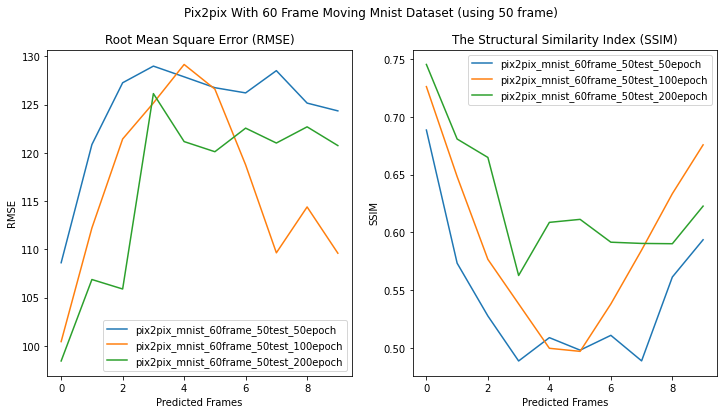

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(12, 6))
ax[0].plot(pix2pix_mnist_rmse_60frame_50test_50epoch, label= "pix2pix_mnist_60frame_50test_50epoch")
ax[1].plot(pix2pix_mnist_ssim_60frame_50test_50epoch, label= "pix2pix_mnist_60frame_50test_50epoch")
ax[0].plot(pix2pix_mnist_rmse_60frame_50test_100epoch, label= "pix2pix_mnist_60frame_50test_100epoch")
ax[1].plot(pix2pix_mnist_ssim_60frame_50test_100epoch, label= "pix2pix_mnist_60frame_50test_100epoch")
ax[0].plot(pix2pix_mnist_rmse_60frame_50test_200epoch, label= "pix2pix_mnist_60frame_50test_200epoch")
ax[1].plot(pix2pix_mnist_ssim_60frame_50test_200epoch, label= "pix2pix_mnist_60frame_50test_200epoch")
ax[0].set(title='Root Mean Square Error (RMSE)')
ax[0].set_xlabel('Predicted Frames')
ax[0].set_ylabel('RMSE')
ax[1].set(title='The Structural Similarity Index (SSIM)')
ax[1].set_xlabel('Predicted Frames')
ax[1].set_ylabel('SSIM')
fig.suptitle('Pix2pix With 60 Frame Moving Mnist Dataset (using 50 frame)')
ax[0].legend()
ax[1].legend()
plt.show()

### Classic Moving Mnist

Pix2pix 50 Epoch With Moving Mnist Dataset

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.


RMSE: 40.798529624623114    SSIM: 0.9245291198543913
RMSE: 113.04914691911932    SSIM: 0.6201319826676539
RMSE: 121.21159689032697    SSIM: 0.591811413234994
RMSE: 119.47794154414028    SSIM: 0.5792484744839921
RMSE: 115.60496870404187    SSIM: 0.5895100309030278
RMSE: 121.13210078193043    SSIM: 0.5623663101137905
RMSE: 125.56709836340987    SSIM: 0.5400742887807064
RMSE: 123.81528225987998    SSIM: 0.5360366681420353
RMSE: 118.41337773809069    SSIM: 0.539306089679182
RMSE: 117.02278006733347    SSIM: 0.532628919211674


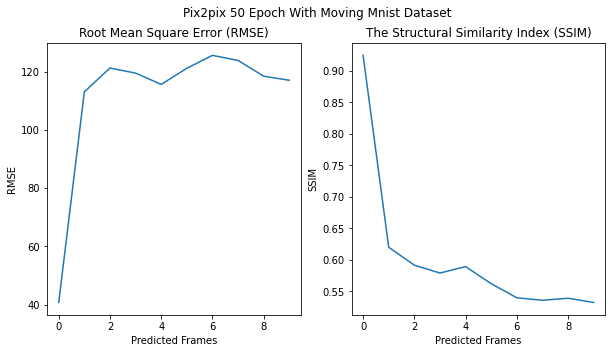

In [ ]:
pix2pix_mnist_rmse_10frame_50epoch = []
pix2pix_mnist_ssim_10frame_50epoch  = []
for x in range(10):
  truth_path = "/content/drive/MyDrive/pix2pix_mnist_predictions/10frame/mnist_64/train_frames/frame-0000"+str(10+x)+".jpg"
  predict_path = "/content/drive/MyDrive/pix2pix_mnist_predictions/10frame/mnist_64_50epoch_10frame/frames/frame-000"+str(10+x)+".jpg"
  rms=rmse(truth_path,predict_path)
  pix2pix_mnist_rmse_10frame_50epoch .append(rms)
  sim_score, diff = similartiy_for_nfp(truth_path, predict_path)
  pix2pix_mnist_ssim_10frame_50epoch .append(sim_score)
  print("RMSE: {}    SSIM: {}".format(rms,sim_score))

fig, ax = plt.subplots(1,2,figsize=(10, 5))
ax[0].plot(pix2pix_mnist_rmse_10frame_50epoch )
ax[1].plot(pix2pix_mnist_ssim_10frame_50epoch )
ax[0].set(title='Root Mean Square Error (RMSE)')
ax[0].set_xlabel('Predicted Frames')
ax[0].set_ylabel('RMSE')
ax[1].set(title='The Structural Similarity Index (SSIM)')
ax[1].set_xlabel('Predicted Frames')
ax[1].set_ylabel('SSIM')
fig.suptitle('Pix2pix 50 Epoch With Moving Mnist Dataset')
plt.show()

Pix2pix 100 Epoch With Moving Mnist Dataset

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.


RMSE: 18.208643208652312    SSIM: 0.9795319933714942
RMSE: 115.91149893749757    SSIM: 0.6320078960748797
RMSE: 124.16810878112483    SSIM: 0.6076771518562086
RMSE: 119.3375155889929    SSIM: 0.6025573114995776
RMSE: 114.08577994450874    SSIM: 0.6168793371104642
RMSE: 119.24304204511002    SSIM: 0.6031450765292068
RMSE: 125.92256812844352    SSIM: 0.5741585364211159
RMSE: 126.0082268829599    SSIM: 0.5699083290603372
RMSE: 122.39078458115475    SSIM: 0.5723941810567766
RMSE: 124.30308850748641    SSIM: 0.5553830231902271


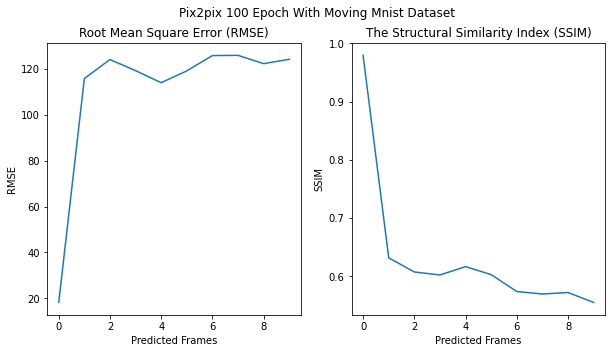

In [ ]:
pix2pix_mnist_rmse_10frame_100epoch = []
pix2pix_mnist_ssim_10frame_100epoch  = []
for x in range(10):
  truth_path = "/content/drive/MyDrive/pix2pix_mnist_predictions/10frame/mnist_64/train_frames/frame-0000"+str(10+x)+".jpg"
  predict_path = "/content/drive/MyDrive/pix2pix_mnist_predictions/10frame/mnist_64_100epoch_10frame/frames/frame-000"+str(10+x)+".jpg"
  rms=rmse(truth_path,predict_path)
  pix2pix_mnist_rmse_10frame_100epoch .append(rms)
  sim_score, diff = similartiy_for_nfp(truth_path, predict_path)
  pix2pix_mnist_ssim_10frame_100epoch .append(sim_score)
  print("RMSE: {}    SSIM: {}".format(rms,sim_score))

fig, ax = plt.subplots(1,2,figsize=(10, 5))
ax[0].plot(pix2pix_mnist_rmse_10frame_100epoch )
ax[1].plot(pix2pix_mnist_ssim_10frame_100epoch )
ax[0].set(title='Root Mean Square Error (RMSE)')
ax[0].set_xlabel('Predicted Frames')
ax[0].set_ylabel('RMSE')
ax[1].set(title='The Structural Similarity Index (SSIM)')
ax[1].set_xlabel('Predicted Frames')
ax[1].set_ylabel('SSIM')
fig.suptitle('Pix2pix 100 Epoch With Moving Mnist Dataset')
plt.show()

Pix2pix 200 Epoch With Moving Mnist Dataset

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.


RMSE: 9.7110097794977    SSIM: 0.9899774041433473
RMSE: 117.58969731257284    SSIM: 0.6161948781413814
RMSE: 127.04994961536043    SSIM: 0.5673407891648606
RMSE: 130.2745663837895    SSIM: 0.5366993802763929
RMSE: 134.15576683613205    SSIM: 0.539700707263437
RMSE: 128.62470200099105    SSIM: 0.5504982741028883
RMSE: 121.40052371469872    SSIM: 0.5772468536142823
RMSE: 122.97453230528313    SSIM: 0.5593816510036436
RMSE: 131.1495262751166    SSIM: 0.5231318571238553
RMSE: 135.52506038437136    SSIM: 0.4963227031965686


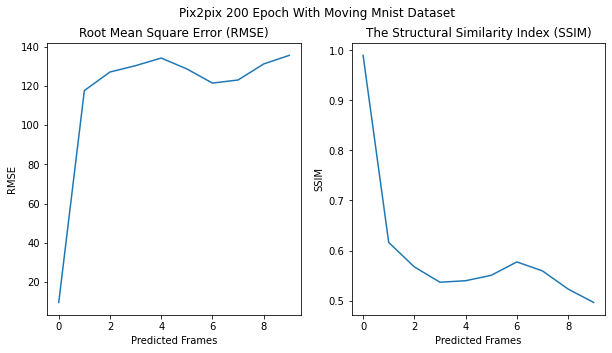

In [ ]:
pix2pix_mnist_rmse_10frame_200epoch = []
pix2pix_mnist_ssim_10frame_200epoch  = []
for x in range(10):
  truth_path = "/content/drive/MyDrive/pix2pix_mnist_predictions/10frame/mnist_64/train_frames/frame-0000"+str(10+x)+".jpg"
  predict_path = "/content/drive/MyDrive/pix2pix_mnist_predictions/10frame/mnist_64_200epoch_10frames/frames/frame-000"+str(10+x)+".jpg"
  rms=rmse(truth_path,predict_path)
  pix2pix_mnist_rmse_10frame_200epoch .append(rms)
  sim_score, diff = similartiy_for_nfp(truth_path, predict_path)
  pix2pix_mnist_ssim_10frame_200epoch .append(sim_score)
  print("RMSE: {}    SSIM: {}".format(rms,sim_score))

fig, ax = plt.subplots(1,2,figsize=(10, 5))
ax[0].plot(pix2pix_mnist_rmse_10frame_200epoch )
ax[1].plot(pix2pix_mnist_ssim_10frame_200epoch )
ax[0].set(title='Root Mean Square Error (RMSE)')
ax[0].set_xlabel('Predicted Frames')
ax[0].set_ylabel('RMSE')
ax[1].set(title='The Structural Similarity Index (SSIM)')
ax[1].set_xlabel('Predicted Frames')
ax[1].set_ylabel('SSIM')
fig.suptitle('Pix2pix 200 Epoch With Moving Mnist Dataset')
plt.show()

Pix2pix With Moving Mnist Dataset

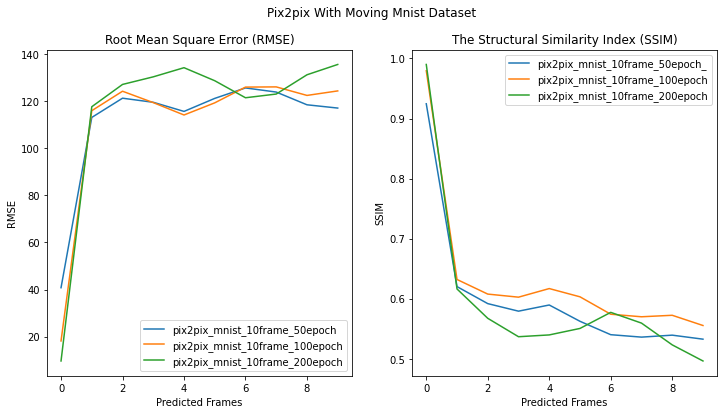

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(12, 6))
ax[0].plot(pix2pix_mnist_rmse_10frame_50epoch, label= "pix2pix_mnist_10frame_50epoch")
ax[1].plot(pix2pix_mnist_ssim_10frame_50epoch, label= "pix2pix_mnist_10frame_50epoch_")
ax[0].plot(pix2pix_mnist_rmse_10frame_100epoch, label= "pix2pix_mnist_10frame_100epoch")
ax[1].plot(pix2pix_mnist_ssim_10frame_100epoch, label= "pix2pix_mnist_10frame_100epoch")
ax[0].plot(pix2pix_mnist_rmse_10frame_200epoch, label= "pix2pix_mnist_10frame_200epoch")
ax[1].plot(pix2pix_mnist_ssim_10frame_200epoch, label= "pix2pix_mnist_10frame_200epoch")
ax[0].set(title='Root Mean Square Error (RMSE)')
ax[0].set_xlabel('Predicted Frames')
ax[0].set_ylabel('RMSE')
ax[1].set(title='The Structural Similarity Index (SSIM)')
ax[1].set_xlabel('Predicted Frames')
ax[1].set_ylabel('SSIM')
fig.suptitle('Pix2pix With Moving Mnist Dataset')
ax[0].legend()
ax[1].legend()
plt.show()